In [1]:
# Load a local copy of the current ODYM branch:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#from seaborn.palettes import color_palette
import xlrd
import pylab
from copy import deepcopy
import logging as log
from xlrd.biffh import BIFF_FIRST_UNICODE
import xlwt
from scipy.stats import norm
from cycler import cycler
#import seaborn as sns
import dynamic_stock_model as dsm
import product_component_model as pcm

In [2]:
# Loading data
path = os.getcwd()
data = pd.read_csv(path+"/data/Supplementary_information/dummy_data_battery.csv", header=0 , sep=',')
# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

# We store the time and inflows values in two lists
time = data['Time'].to_numpy()
stock_cars = data['Population'].to_numpy() 
years = len(time)

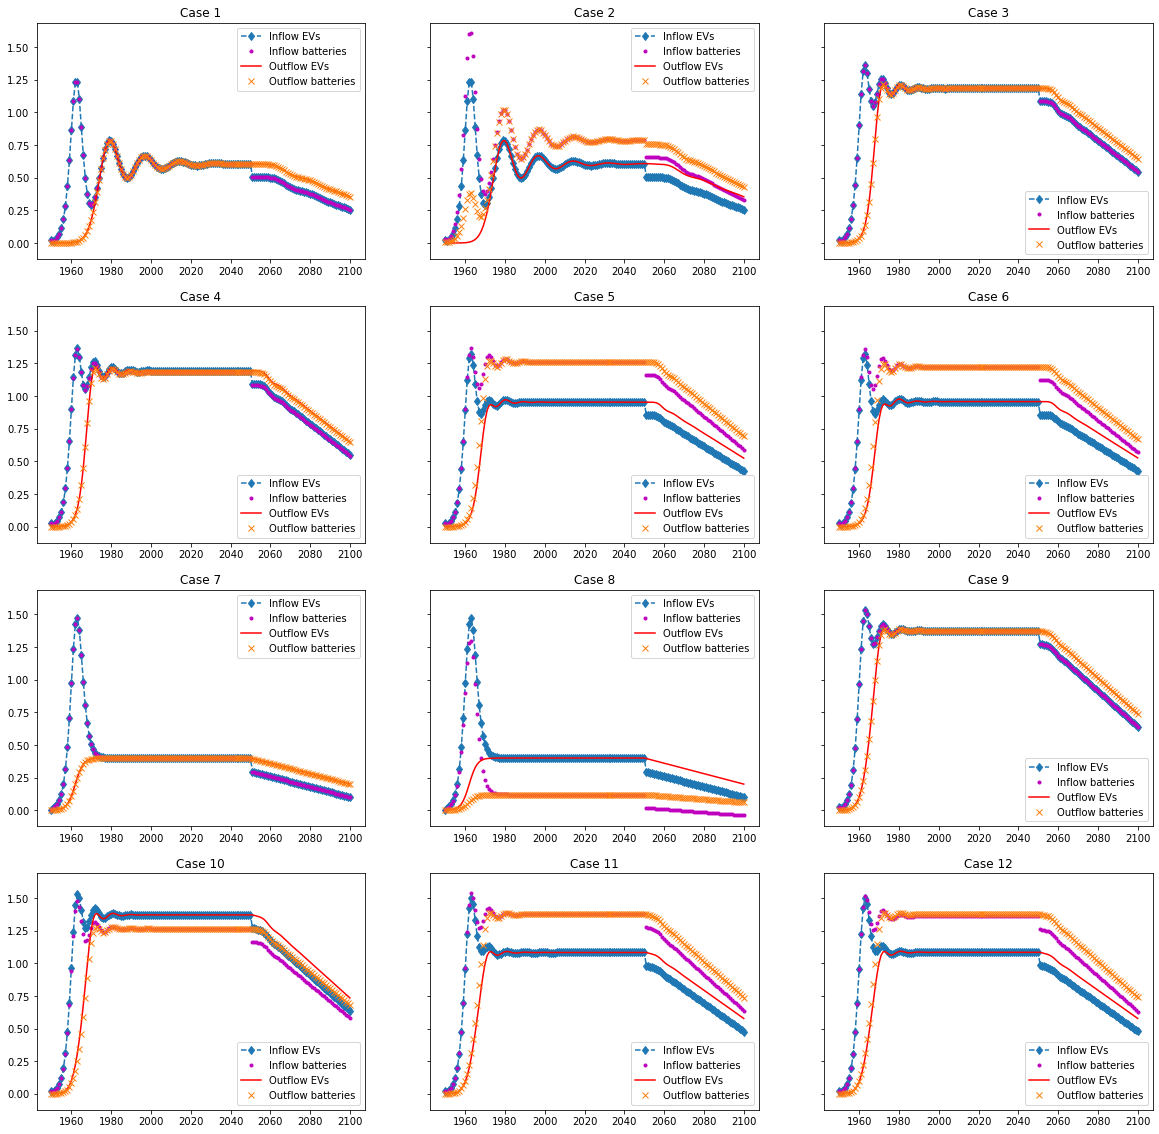

In [3]:
fig, axs = plt.subplots(4, 3, figsize=(20,20), sharey=True)
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, 
                                  lt_cm={'Type': 'Normal', 'Mean':np.array([8]), 'StdDev': np.array([2])}, 
                                  lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])},
                                  d=0.04, reuse_coeff=0.3, replacement_coeff=0.3)
# Case 1
Model.case_1()
axs[0, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 0].set_title('Case 1')
axs[0, 0].legend(loc='best')

# Case 2
Model.case_2()

axs[0, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[0, 1].set_title('Case 2')
axs[0, 1].legend(loc='best')

# Case 3
Model.case_3()

axs[0, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 2].set_title('Case 3')
axs[0, 2].legend(loc='best')

# Case 4

Model.case_4()
axs[1, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 0].set_title('Case 4')
axs[1, 0].legend(loc='best')

# Case 5

Model.case_5()
axs[1, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 1].set_title('Case 5')
axs[1, 1].legend(loc='best')


# Case 6

Model.case_6()

axs[1, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 2].set_title('Case 6')
axs[1, 2].legend(loc='best')


# Case 7a

Model.case_7()

axs[2, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 0].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 0].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 0].set_title('Case 7')
axs[2, 0].legend(loc='best')


# Case 8a

Model.case_8()

axs[2, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 1].set_title('Case 8')
axs[2, 1].legend(loc='best')

# Case 9

Model.case_9()

axs[2, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[2, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[2, 2].set_title('Case 9')
axs[2, 2].legend(loc='best')


# Case 10

Model.case_10()

axs[3, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[3, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 0].set_title('Case 10')
axs[3, 0].legend(loc='best')


# Case 11

Model.case_11()

axs[3, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 1].set_title('Case 11')
axs[3, 1].legend(loc='best')


# Case 12

Model.case_12()

axs[3, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 2].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 2].set_title('Case 12')
axs[3, 2].legend(loc='best')

plt.show()